Дані
==
Дані складаються із трьох таблиць
* користувачі
* рейтинги
* книги

Імпортуємо бібліотеки
-

In [1]:
import pandas as pd
from plotly.graph_objects import *
import numpy as np

Користувачі
--

In [2]:
users = pd.read_csv('datasets/book-crossing/Users.csv',
                    sep=';',
                    on_bad_lines='skip')
users.head()

/tmp/ipykernel_40529/3010168639.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('datasets/book-crossing/Users.csv',


User-ID  Age
0       1  NaN
1       2   18
2       3  NaN
3       4   17
4       5  NaN

In [6]:
users.notna().mean()

User-ID    1.000000
Age        0.604703
dtype: float64

Рейтинги
--

In [3]:
ratings = pd.read_csv('datasets/book-crossing/Ratings.csv',
                      sep=';',
                      on_bad_lines='skip')
ratings.head()

User-ID        ISBN  Rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6

Книги
----

In [6]:
books = pd.read_csv('datasets/book-crossing/Books.csv',
                    on_bad_lines='skip',
                    sep=';')
books.head()

ISBN                                              Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company

Поєднаємо користувачів із рейтингами
--

In [7]:

df = pd.merge(users, ratings, on='User-ID', how='inner')
df.head()

User-ID  Age        ISBN  Rating
0       2   18  0195153448       0
1       7  NaN   034542252       0
2       8  NaN  0002005018       5
3       8  NaN  0060973129       0
4       8  NaN  0374157065       0

Розподіл рейтингів
--

array([ 6.89960783,  5.91667959,  9.05970502,  6.67259359,  3.2167889 ,
        4.4577508 ,  0.76745397,  0.51929852,  0.23726172,  0.1543586 ,
       62.09850147])

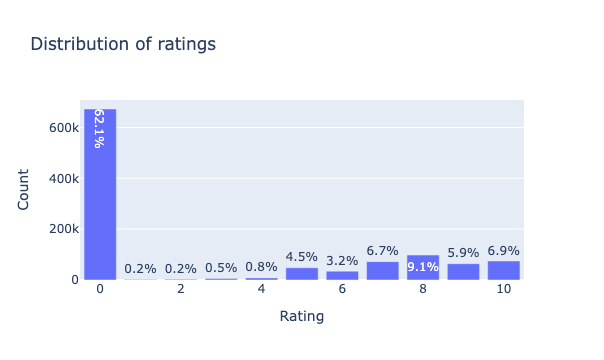

In [20]:
data = df['Rating'].value_counts().sort_index(ascending=False)

trace = Bar(x = data.index,
            text = [f'{np.round(val,1)}%' for val in (data.values / data.values.sum() * 100)],
            y = data.values)
layout = Layout(title = 'Distribution of ratings',
               xaxis = {'title':'Rating'},
               yaxis = {'title':'Count'})
fig = Figure(data=trace, layout=layout)
fig.show()

Тобто 62% всіх рейтингів у даних дорівнюють нулю, та дуже мало рейтингів мають розмір нижче 4. 

Розподіл рейтингів
===

In [40]:
def plot_distribution_by_var(var):
    data = df.groupby(var)['Rating'].count().clip(upper=50)
    trace = Histogram(x = data.values)

    layout = Layout(title = f'Distribution of the number of ratings per {var}',
                   xaxis = {'title': f'Number of ratings per {var}'},
                   yaxis = {'title':'Count'},
                   bargap=.2)
    
    fig = Figure(data=trace,
                layout=layout)
    return fig

Розподіл рейтингів за книгами
----

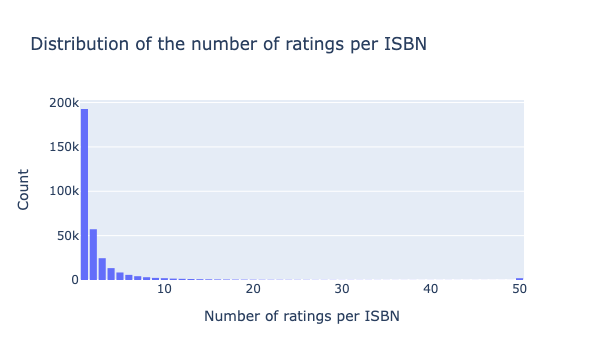

In [41]:
fig = plot_distribution_by_var('ISBN')
fig.show()

Розподіл має довгий хвіст, дуже мало книг мають велику кількість рейтингів.

Розподіл рейтингів за користувачами
--

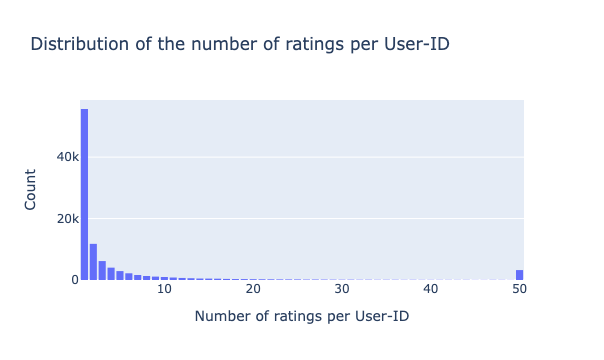

In [44]:
fig = plot_distribution_by_var('User-ID')
fig.show()

Знову ж такі, бачимо, що більшість користувачів дали мало рейтингів книгам.
Аби знизити розмірність, ми відфільтруємо книги, які мають мало рейтингів, а також користувачів.

In [46]:
def filter( var, min_val):
    filtered_results = df[var].value_counts() > min_val
    filtered_results = filtered_results[filtered_results].index.tolist()
    return filtered_results

In [53]:
min_val = 50
filtered_books = filter('ISBN', min_val)
filtered_users = filter('User-ID', min_val)

df_new = df[(df['ISBN'].isin(filtered_books))&(df['User-ID'].isin(filtered_users))]

In [55]:
df_new.shape

(127313, 4)

In [56]:
df.shape

(1083192, 4)

In [58]:
df_new.to_csv('datasets/book-crossing/users-ratings.csv',
              index=False)